In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. red: 0.3742
	2. blue: 0.3299
	3. color: 0.3152
	4. green: 0.2674
	5. is: 0.2655
	6. has: 0.1794
	7. this: 0.0671
	8. four: 0.0547
	9. angle: 0.0432
	10. three: 0.0330
	11. up: 0.0265
	12. blank: 0.0119
	13. bottom: 0.0105
	14. position: 0.0038
	15. round: 0.0006
	16. white: 0.0000
	17. rotate: 0.0000
	18. left: 0.0000
	19. shape: 0.0000
	20. canvas: 0.0000
	21. right: 0.0000
	22. unrotate: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


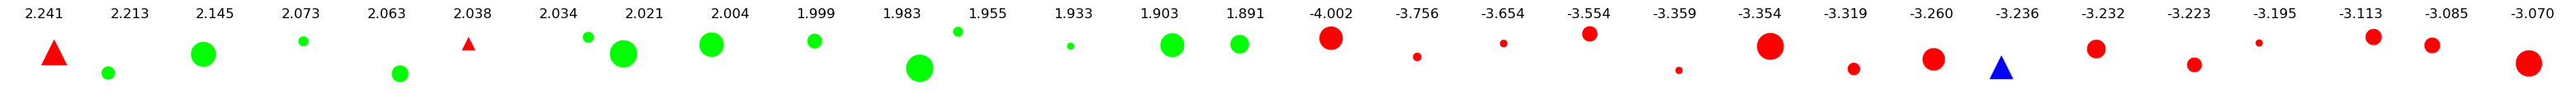

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. canvas: 0.1607
	2. white: 0.1577
	3. unrotate: 0.1486
	4. rotate: 0.1448
	5. round: 0.1396
	6. shape: 0.1377
	7. blank: 0.1344
	8. angle: 0.1115
	9. right: 0.1094
	10. up: 0.0672
	11. bottom: 0.0637
	12. three: 0.0499
	13. position: 0.0455
	14. this: 0.0435
	15. green: 0.0416
	16. four: 0.0382
	17. color: 0.0320
	18. blue: 0.0119
	19. is: 0.0013
	20. has: 0.0010
	21. red: 0.0004
	22. left: 0.0001
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


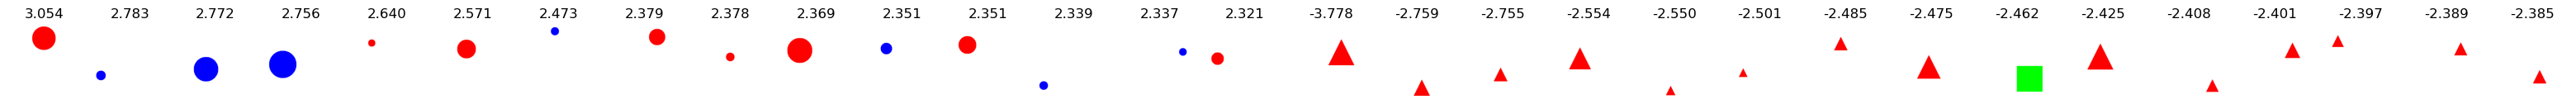

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. this: 0.5240
	2. blue: 0.4738
	3. four: 0.3277
	4. round: 0.1382
	5. color: 0.0761
	6. green: 0.0642
	7. has: 0.0635
	8. up: 0.0412
	9. angle: 0.0037
	10. blank: 0.0020
	11. three: 0.0000
	12. red: 0.0000
	13. rotate: 0.0000
	14. bottom: 0.0000
	15. white: 0.0000
	16. right: 0.0000
	17. position: 0.0000
	18. canvas: 0.0000
	19. shape: 0.0000
	20. left: 0.0000
	21. unrotate: 0.0000
	22. is: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


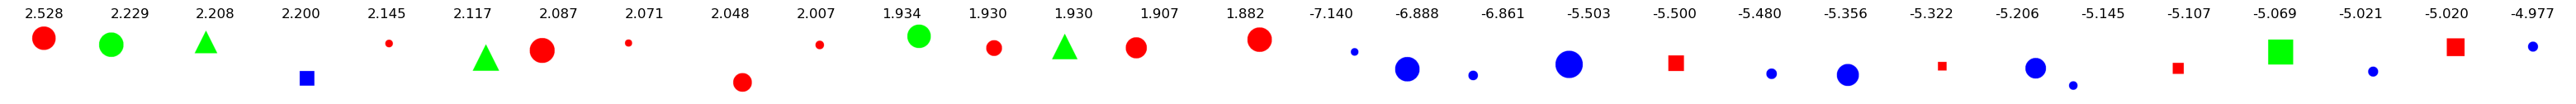

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. position: 0.2437
	2. bottom: 0.2281
	3. left: 0.2136
	4. is: 0.2003
	5. has: 0.1688
	6. up: 0.1061
	7. red: 0.0952
	8. right: 0.0840
	9. rotate: 0.0775
	10. three: 0.0768
	11. four: 0.0701
	12. unrotate: 0.0535
	13. shape: 0.0468
	14. this: 0.0372
	15. blue: 0.0244
	16. canvas: 0.0088
	17. color: 0.0049
	18. blank: 0.0042
	19. angle: 0.0024
	20. green: 0.0000
	21. <pad>: 0.0000
	22. round: 0.0000
	23. white: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


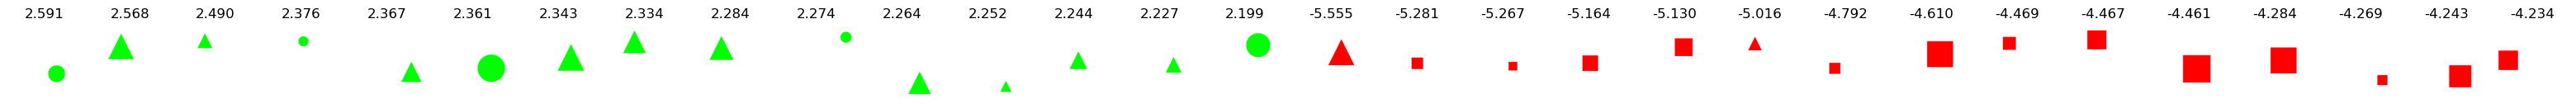

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. is: 0.4465
	2. position: 0.3912
	3. red: 0.2653
	4. has: 0.2311
	5. four: 0.1108
	6. bottom: 0.1068
	7. color: 0.0570
	8. left: 0.0405
	9. up: 0.0337
	10. this: 0.0221
	11. blue: 0.0087
	12. canvas: 0.0040
	13. rotate: 0.0016
	14. blank: 0.0010
	15. green: 0.0000
	16. three: 0.0000
	17. angle: 0.0000
	18. right: 0.0000
	19. white: 0.0000
	20. unrotate: 0.0000
	21. shape: 0.0000
	22. <pad>: 0.0000
	23. round: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


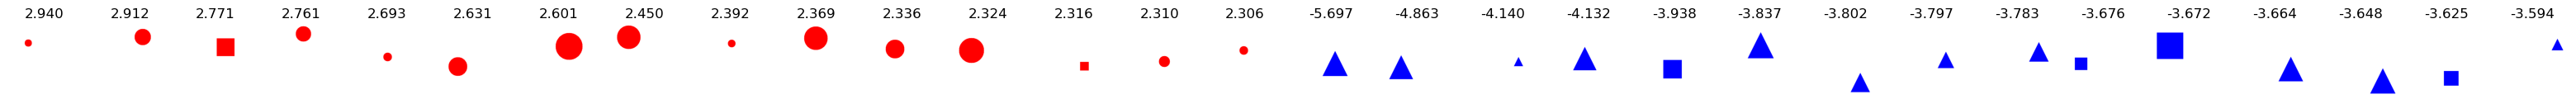

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. has: 0.6712
	2. four: 0.5309
	3. blue: 0.4034
	4. red: 0.3010
	5. up: 0.1722
	6. <pad>: 0.0138
	7. is: 0.0138
	8. round: 0.0138
	9. green: 0.0131
	10. bottom: 0.0082
	11. right: 0.0054
	12. rotate: 0.0049
	13. blank: 0.0048
	14. color: 0.0046
	15. shape: 0.0046
	16. this: 0.0046
	17. canvas: 0.0046
	18. position: 0.0046
	19. white: 0.0044
	20. unrotate: 0.0043
	21. left: 0.0039
	22. three: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


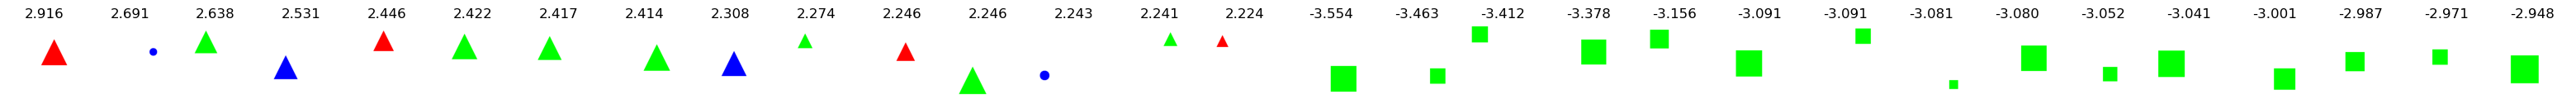

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. green: 0.2637
	2. color: 0.2626
	3. blue: 0.2241
	4. red: 0.2226
	5. this: 0.1777
	6. has: 0.1706
	7. three: 0.1518
	8. is: 0.1437
	9. up: 0.0796
	10. angle: 0.0552
	11. blank: 0.0366
	12. four: 0.0153
	13. round: 0.0084
	14. position: 0.0074
	15. bottom: 0.0069
	16. <pad>: 0.0000
	17. white: 0.0000
	18. right: 0.0000
	19. unrotate: 0.0000
	20. canvas: 0.0000
	21. shape: 0.0000
	22. rotate: 0.0000
	23. left: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


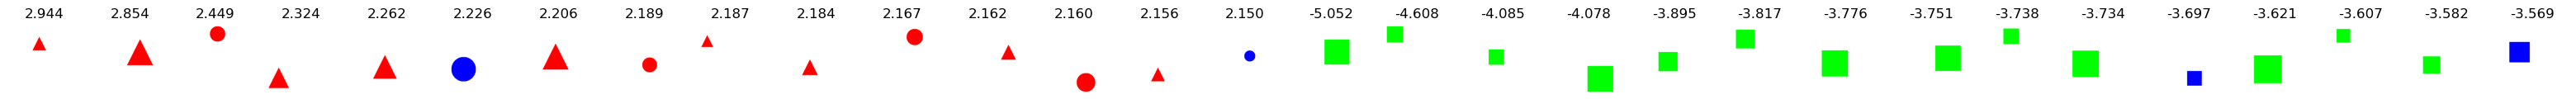

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. this: 0.3128
	2. blue: 0.1619
	3. four: 0.1538
	4. round: 0.1482
	5. up: 0.1288
	6. shape: 0.1238
	7. green: 0.0943
	8. angle: 0.0937
	9. has: 0.0830
	10. blank: 0.0749
	11. canvas: 0.0602
	12. right: 0.0483
	13. three: 0.0462
	14. color: 0.0407
	15. left: 0.0147
	16. bottom: 0.0112
	17. position: 0.0071
	18. unrotate: 0.0059
	19. red: 0.0001
	20. is: 0.0000
	21. <pad>: 0.0000
	22. white: 0.0000
	23. rotate: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


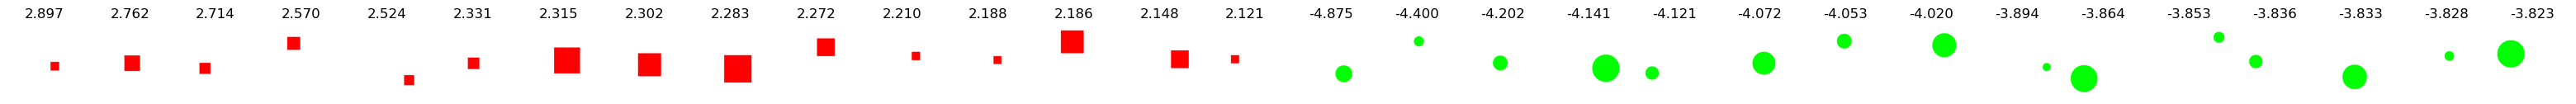

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. four: 0.6819
	2. round: 0.5374
	3. left: 0.4839
	4. canvas: 0.3095
	5. blue: 0.0433
	6. this: 0.0158
	7. up: 0.0050
	8. three: 0.0000
	9. right: 0.0000
	10. has: 0.0000
	11. angle: 0.0000
	12. green: 0.0000
	13. white: 0.0000
	14. bottom: 0.0000
	15. rotate: 0.0000
	16. red: 0.0000
	17. position: 0.0000
	18. color: 0.0000
	19. shape: 0.0000
	20. unrotate: 0.0000
	21. blank: 0.0000
	22. is: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


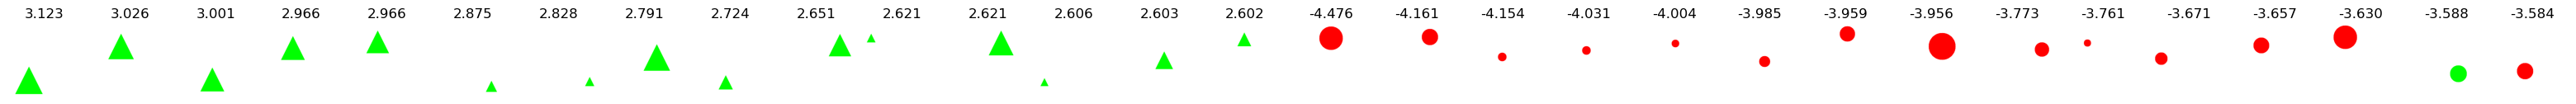

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. three: 0.1840
	2. angle: 0.1446
	3. color: 0.1415
	4. up: 0.1371
	5. blank: 0.1355
	6. right: 0.1263
	7. green: 0.1232
	8. white: 0.1179
	9. unrotate: 0.0802
	10. bottom: 0.0686
	11. shape: 0.0679
	12. round: 0.0666
	13. this: 0.0638
	14. rotate: 0.0612
	15. canvas: 0.0491
	16. red: 0.0489
	17. four: 0.0466
	18. position: 0.0403
	19. blue: 0.0394
	20. has: 0.0178
	21. is: 0.0019
	22. <pad>: 0.0000
	23. left: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


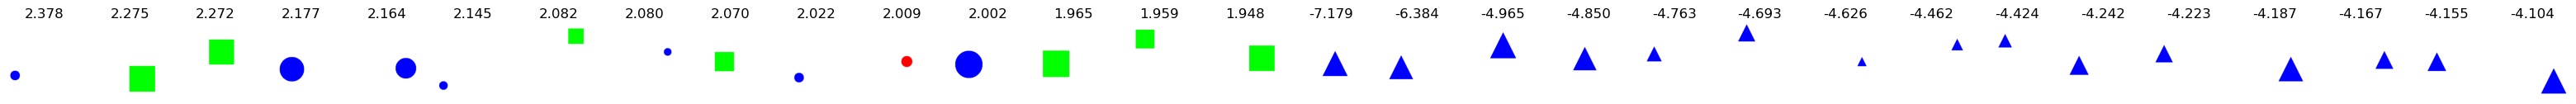

----------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):
    visualize_concept(i)